In [1]:
%matplotlib inline

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# El Ecosistema de herramientas de Machine Learning y Data Science

### Juan Pedro Fisanotti

@fisadev, fisadev@gmail.com

Slides: [bit.ly/ds-ecosystem-talk](https://bit.ly/ds-ecosystem-talk)

# Panorama global

Código propio? Servicio enlatado? Algo intermedio?


![](files/own-code-vs-visual-prebuilt-tools.png)

- Vendor lockin vs ownership

- Flexibilidad de elegir mejor herramienta y modificarla

- Sensibilidad, tamaño y ubicación de los datos

- Deploy: infra propia? Control?

# Código propio: programado en qué?

El lenguaje que más me guste?

El lenguaje mejor equipado (disponibilidad y madurez de herramientas)

En la actualidad: Python y R

Python: no solo equipado para Data Science, también equipado para casi todo

# Herramientas en Python

## Entorno de experimentación

[Jupyter notebooks](https://jupyter.org/)!

Ejemplo: [EDA sobre pasajeros del Titanic](https://github.com/ucseml-team/machine-learning-course/blob/master/titanic/EDA.ipynb)

Interactividad al experimentar, editar y correr una parte, visualizar resultados con el código vivo, generar documentos compartibles. Hasta slides interactivas! (estas!)

## Manejo de datos


- [Numpy](https://www.numpy.org/): arrays multidimensionales. Más bajo nivel.

- [Pandas](https://pandas.pydata.org/): data tabular. Más alto nivel.

Numpy es super rápido, escrito en C, pero ni nos enteramos desde Python.

Pandas usa Numpy por dentro :)

In [2]:
import numpy as np

a = np.random.random((5, 3))
a

array([[0.76283931, 0.54013223, 0.41268958],
       [0.65041129, 0.76851466, 0.93164286],
       [0.89496556, 0.39256089, 0.29965581],
       [0.52821704, 0.76035163, 0.202223  ],
       [0.14472913, 0.20069208, 0.32104792]])

In [3]:
a[a < 0.5] = 0
a

array([[0.76283931, 0.54013223, 0.        ],
       [0.65041129, 0.76851466, 0.93164286],
       [0.89496556, 0.        , 0.        ],
       [0.52821704, 0.76035163, 0.        ],
       [0.        , 0.        , 0.        ]])

In [4]:
import pandas as pd

passengers = pd.read_csv('/home/fisa/devel/ucse/ml/repo/titanic/train.csv')
passengers.shape

(891, 12)

In [5]:
passengers.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.75,NaN,Q


In [6]:
passengers.Age.isnull().sum()

177

In [7]:
passengers = passengers[~passengers.Age.isnull()]
passengers.shape

(714, 12)

In [8]:
passengers[passengers.Age > 70].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [9]:
passengers['priority'] = (passengers.Sex == 'female') | (passengers.Age <= 15)
passengers.priority.value_counts()

False    413
True     301
Name: priority, dtype: int64

In [10]:
passengers.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,priority
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,False
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,True
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,False
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,True
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S,False


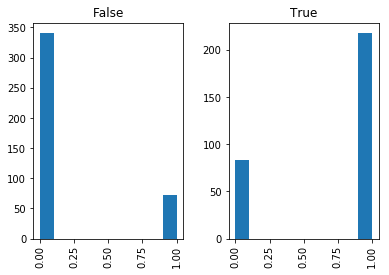

In [11]:
passengers.Survived.hist(by=passengers.priority);

## Manejo de datos en mayor escala


Pandas trabaja con los datos en ram. Y si mi ram no es suficiente?

Más ram.

o [Dask](https://dask.org/): un Pandas para datos que no entran en ram

## Visualización


- [Matplotlib](https://matplotlib.org/): la herramienta más básica para graficar (muy potente, no tan amigable, muy compatible con otras cosas como Pandas!)

- [Bokeh](https://bokeh.pydata.org/en/latest/): más interactivo, más lindo

- Otros! [Seaborn](https://seaborn.pydata.org/) (usa Matplotlib por dentro), [Altair](https://altair-viz.github.io/), [Plotly](https://plot.ly/python/), ...

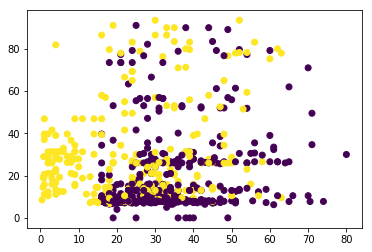

In [12]:
from matplotlib import pyplot

normal_passengers = passengers[passengers.Fare < 100]

pyplot.scatter(
    normal_passengers.Age,
    normal_passengers.Fare, 
    c=normal_passengers.priority,
);

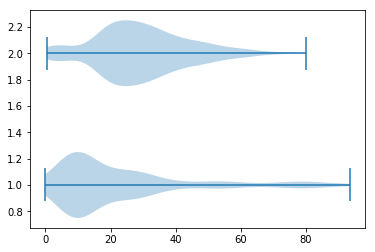

In [13]:
pyplot.violinplot(
    [normal_passengers.Fare,
     passengers.Age],
    vert=False,
);

Muchísimo más!

[Galería](https://matplotlib.org/gallery.html)

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [15]:
p = figure(plot_width=400, plot_height=400)

colors = ['green' if row.Survived else 'red' for index, row in passengers.iterrows()]

p.circle(passengers.Age, passengers.Fare, size=5, color=colors, alpha=0.5)

show(p)

Muchísimo más!

[Galería](https://bokeh.pydata.org/en/latest/docs/gallery.html)

## Modelos predictivos (Machine Learning)


- [Scikit Learn](https://scikit-learn.org/): el estándar. Muchísimos tipos de modelos, y utilidades alrededor.

- [Keras](https://keras.io/) y [Pytorch](https://pytorch.org/) (alternativas): redes neuronales. Muchísimas utilidades y tipos de redes. Pueden correr en GPU!! (nvidia)

- [TensorFlow](https://www.tensorflow.org/): para construir modelos desde cero, que pueden correr en GPU. Keras usa TensorFlow por dentro.

In [16]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier()

In [17]:
inputs = passengers[['Age', 'Fare', 'Pclass']]
outputs = passengers.Survived

arbol.fit(inputs, outputs);

In [18]:
arbol.predict([
    # edad, precio pasaje, clase
    [20, 8, 3], 
    [40, 250, 1],
    [10, 200, 2],
])

array([0, 1, 1])

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

predictions = arbol.predict(inputs)

accuracy_score(outputs, predictions)

0.9705882352941176

Muchísimo más!

- Modelos de regresión, clasificación, clustering, reducción de dimensionalidad
- Herramientas de preprocesado, evaluación, optimización de hiperparámetros, encadenamiento de pasos, etc
- [Comparación de clasificadores](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

red = Sequential([
    Dense(50, activation='relu', input_shape=(3, )),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid'),
])

red.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

Using TensorFlow backend.


In [21]:
red.fit(
    inputs, outputs,
    batch_size=100,
    epochs=50,
)

Epoch 1/50
714/714 [==============================] - 1s 916us/step - loss: 0.7316 - acc: 0.5966
Epoch 2/50
714/714 [==============================] - 0s 23us/step - loss: 0.6612 - acc: 0.6793
Epoch 3/50
714/714 [==============================] - 0s 34us/step - loss: 0.6194 - acc: 0.6905
Epoch 4/50
714/714 [==============================] - 0s 27us/step - loss: 0.6179 - acc: 0.6835
Epoch 5/50
714/714 [==============================] - 0s 26us/step - loss: 0.6065 - acc: 0.6947
Epoch 6/50
714/714 [==============================] - 0s 20us/step - loss: 0.6097 - acc: 0.6849
Epoch 7/50
714/714 [==============================] - 0s 24us/step - loss: 0.6124 - acc: 0.6863
Epoch 8/50
714/714 [==============================] - 0s 20us/step - loss: 0.6135 - acc: 0.6849
Epoch 9/50
714/714 [==============================] - 0s 21us/step - loss: 0.6052 - acc: 0.6919
Epoch 10/50
714/714 [==============================] - 0s 21us/step - loss: 0.6135 - acc: 0.6905
Epoch 11/50
714/714 [=================

In [22]:
predictions = red.predict(inputs)

accuracy_score(outputs, np.rint(predictions))

0.711484593837535

Muchísimo más!

Distintos tipos de redes, arquitecturas y capas, optimizadores, métricas, herramientas de generación de datos, etc.

## Otras libs importantes que no vemos

- [Scipy](https://docs.scipy.org/doc/): utilidades de cálculo científico (integración, interpolación, álgebra lineal, estadística, etc)

- [Sympy](https://www.sympy.org/en/index.html): utilidades de matemática simbólica

# Puesta en producción

Es Python! Nos beneficiamos de su ecosistema más general.

Típicamente apis web: [Flask](http://flask.pocoo.org/) para apis simples y sin estado, [Django](https://www.djangoproject.com/) para sitios más complejos.

Pero además todas las cosas de siempre: logging, virtualenvs, testing automatizado, bases de datos, consumo de apis externas, y un "etc" gigante.

# Resumiendo

Hay **muchas** herramientas, acá vimos solo lo más conocido. Pero prácticamente todas las necesidades de un proyecto de Data Science están cubiertas por el ecosistema. No reinventar, buscar siempre antes si no existe.

En general la documentación es buena. Y la comunidad todavía mejor: mucha gente usando y mejorando las herramientas, y dispuesta a ayudar, dar charlas, etc.